In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [2]:
df_spotify = pd.read_csv("../Datasets/spotify_dataset.csv")

In [3]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We see that the Unnamed column is an unnamed column, so it is not relevant for our analysis, so we remove it.

In [4]:
df_spotify.drop("Unnamed: 0", axis=1, inplace=True) 

In [5]:
df_spotify.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df_spotify.loc[pd.isnull(df_spotify['track_name'])]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


We have in row 65900 3 null values in the columns 'artists', 'album_name', 'track_name', 'track_name'.
So I proceed to delete them.

Verify duplicates

In [7]:
df_spotify[df_spotify.duplicated(subset=['track_id'])]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.5770,0,-7.544,1,0.0438,0.2380,0.860000,0.0571,0.8430,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.9000,11,-3.674,1,0.0499,0.1160,0.000017,0.1190,0.5990,104.655,4,alt-rock
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.5210,10,-9.461,1,0.0329,0.0678,0.149000,0.1230,0.3370,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.5680,9,-5.509,0,0.0300,0.0484,0.000417,0.2860,0.3700,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.8070,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.3980,124.053,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113572,1saXUvvFlAQaefZUFVmhCn,Bethel Music;Paul McClure,We Will Not Be Shaken (Live),Jesus We Love You - Live,53,415079,False,0.253,0.3590,11,-8.482,1,0.0317,0.3100,0.000006,0.3590,0.1150,115.348,3,world-music
113605,1Q5jFp1g2Ns4gBsHRpcqhu,Bethel Music;Jenn Johnson;Michaela Gentile,Simple,In The Ordinary - Spontaneous,50,174971,False,0.490,0.2310,0,-13.968,1,0.0265,0.6070,0.000000,0.0859,0.0904,103.958,4,world-music
113617,71dLJx3qHOTQMTvvoE2dmd,Bethel Music;Amanda Cook,Peace,King of My Heart,48,330840,False,0.515,0.0736,8,-15.492,1,0.0310,0.9750,0.000261,0.0820,0.0684,109.964,4,world-music
113619,6OG5TBCmuTOuWCzSGsETrE,Bethel Music;Brian Johnson;Jenn Johnson,Simple,Simple,48,351236,False,0.624,0.1240,5,-11.191,1,0.0280,0.9170,0.000000,0.1200,0.2060,78.014,4,world-music


We have 24259 rows in the 'track_id' column with duplicate values so we will delete them and keep the first one.

In [8]:
df_spotify.drop_duplicates(subset='track_id', keep='first', inplace=True)

In [9]:
df_spotify.nunique()

track_id            89741
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           113
dtype: int64

Statistical Summary

In [10]:
df_spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89741.000000,8.974100e+04,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000
mean,33.198438,2.291418e+05,0.562166,0.634458,5.283549,-8.499004,0.636966,0.087442,0.328289,0.173413,0.216970,0.469477,122.058316,3.897427
std,20.580824,1.129477e+05,0.176691,0.256605,3.559897,5.221490,0.480877,0.113277,0.338321,0.323848,0.194884,0.262864,30.117532,0.453435
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.730400e+05,0.450000,0.457000,2.000000,-10.322000,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.264000,4.000000
50%,33.000000,2.132930e+05,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000
75%,49.000000,2.642930e+05,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097600,0.279000,0.682000,140.077000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


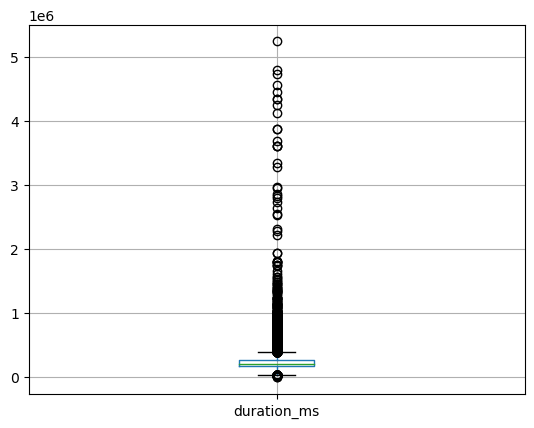

In [11]:
df_spotify.boxplot(column='duration_ms')
plt.show()

Multiple feature plots

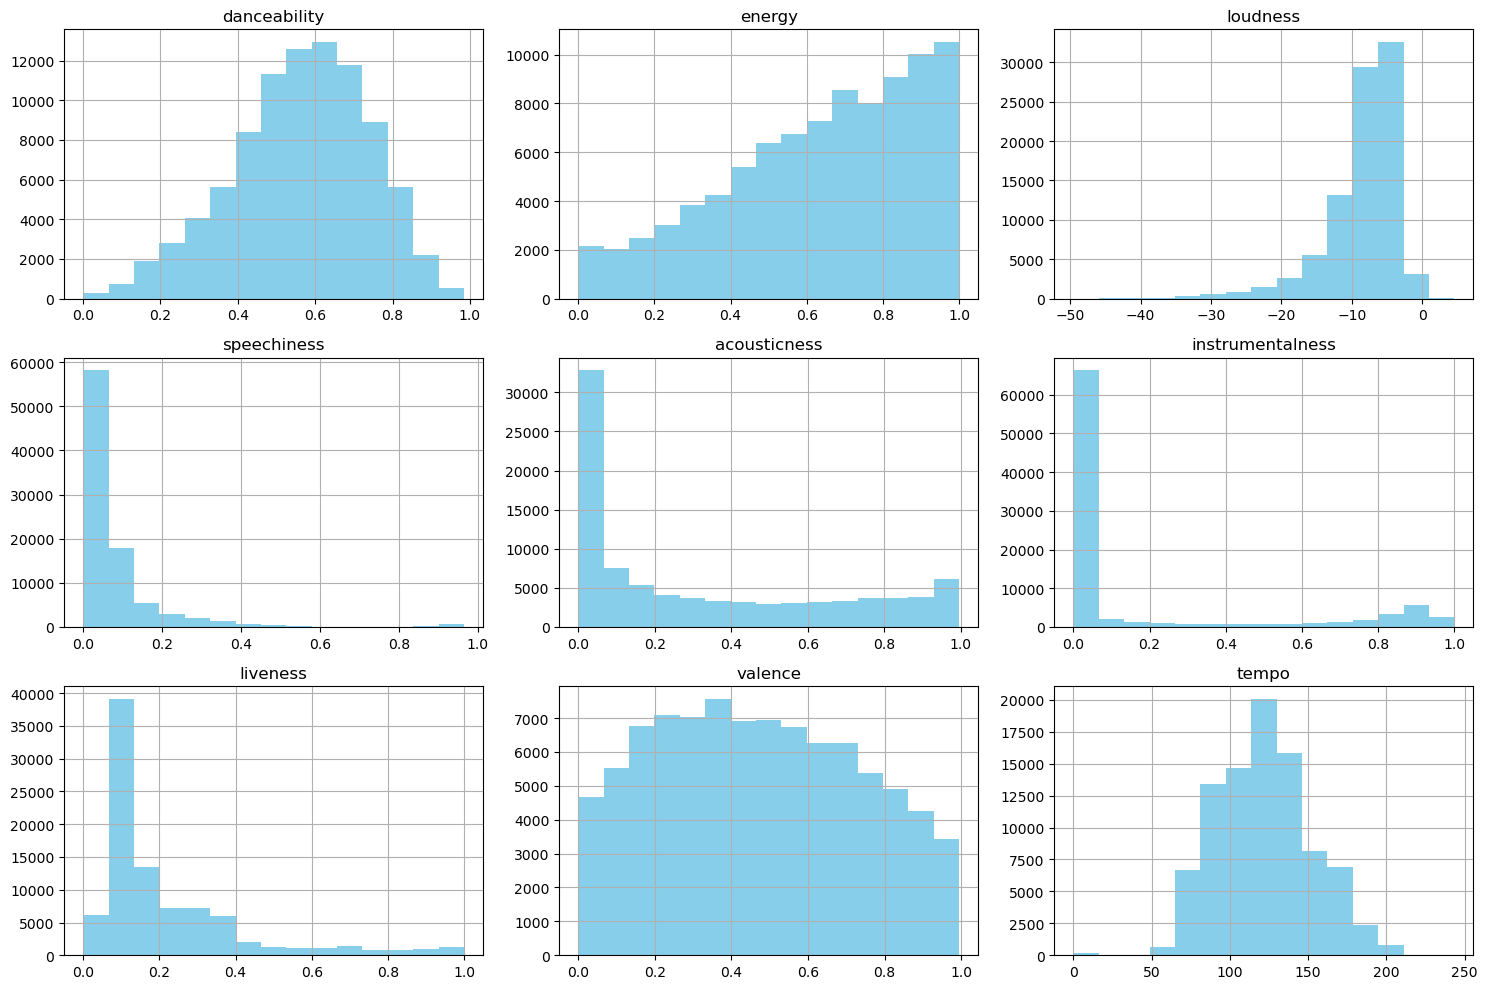

In [12]:
feature_col = ['danceability', 'energy', 'loudness', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df_spotify[feature_col].hist(bins=15, figsize=(15, 10), layout=(3, 3), color='skyblue')
plt.tight_layout()
plt.show()

Data Analysis

Top 5 most popular artists

In [13]:
top5_artist = df_spotify.groupby('artists').count().sort_values(by='track_name', ascending=False)['track_name'][:5]
top5_artist

artists
George Jones         260
my little airport    171
The Beatles          149
BTS                  143
Håkan Hellström      141
Name: track_name, dtype: int64

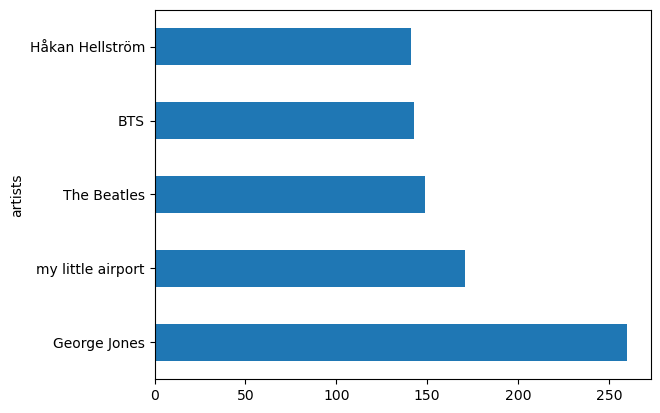

In [14]:
top5_artist.plot.barh()
plt.show()

Artist with the most danceability song

In [18]:
artist_danceability_song = df_spotify[['danceability', 'track_name', 'artists']].sort_values(by='danceability', ascending=False)[:5]
artist_danceability_song

,danceability,track_name,artists
111635,0.985,Sol Clap,Quantic
66576,0.984,Medicaid Baby,That Girl Lay Lay
24916,0.983,Inspiration,Delano Smith
73374,0.982,Daily Routines,Oliver Schories
66793,0.981,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee


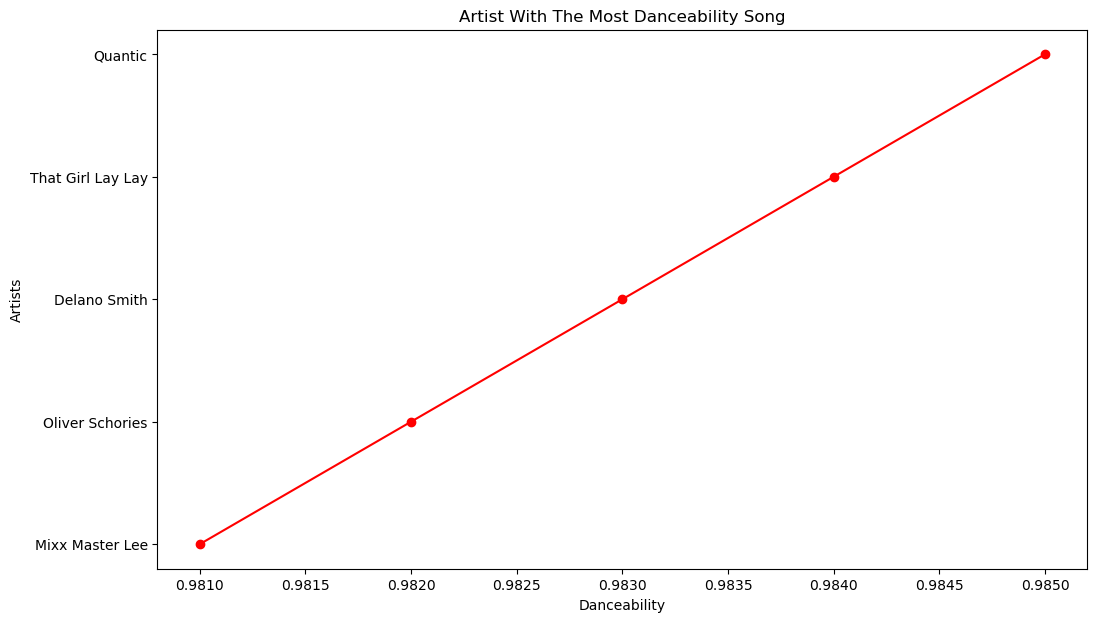

In [19]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='danceability', y='artists', data=artist_danceability_song)
plt.plot(artist_danceability_song['danceability'], artist_danceability_song['artists'], marker='o', color='red')
plt.title('Artist With The Most Danceability Song')
plt.xlabel('Danceability')
plt.ylabel('Artists')
plt.show()